IMPORTING NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

LOADING THE DATASET

In [2]:
df=pd.read_csv('advertisement.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


top 5 heads of the datset

In [3]:
df.shape


(200, 5)

we have 200 rows and 5 columns in overall dataset

In [4]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In 5 columns 1 column is for integer datatype and left other columns is for float datatype.

In [5]:
df.info

<bound method DataFrame.info of      Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

overall information about the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


There is no null value in any  of the columns 4 columns is for float type and 1 column is for integer type data.

STATISTICAL SUMMARY

In [7]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


The  mean and median is almost equal in every columns.

There is difference between 75% and max in every columns.

PREPROCESSING THE DATASET

In [8]:
# Checking null values
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

no null-missing values in the dataset


<AxesSubplot:>

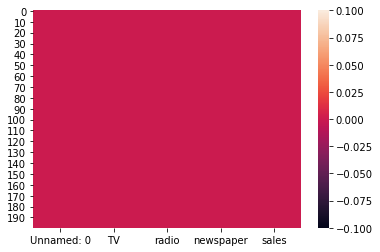

In [9]:
# Checking null value through heatmap
sns.heatmap(df.isnull())

no null-missing values in the dataset

EDA 

CHECKING OUTLIERS

Unnamed: 0       AxesSubplot(0.125,0.536818;0.227941x0.343182)
TV            AxesSubplot(0.398529,0.536818;0.227941x0.343182)
radio         AxesSubplot(0.672059,0.536818;0.227941x0.343182)
newspaper           AxesSubplot(0.125,0.125;0.227941x0.343182)
sales            AxesSubplot(0.398529,0.125;0.227941x0.343182)
dtype: object

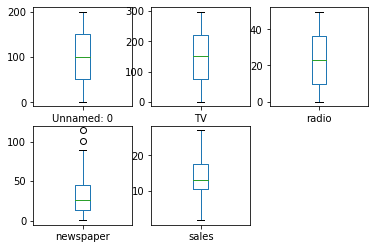

In [10]:
df.plot(kind='box', subplots=True, layout=(2,3))

Apart from the newspaper columns no outliers are present in any of the columns,
but in newspaper columns outlier is not very far so removal of this outlier is not needed.

CHECKING SKEWNESS

In [11]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

data is in range between +5 and -5 are not skewed 
,there is very little skewness is present in the newspaper column.

DISTRIBUTION OF THE DATSET

<AxesSubplot:xlabel='TV', ylabel='Density'>

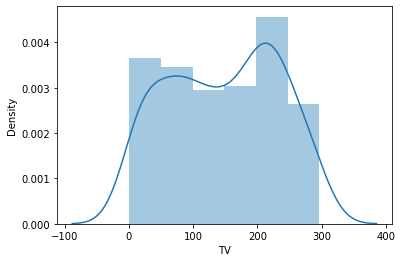

In [12]:
sns.distplot(df['TV'])

<AxesSubplot:xlabel='radio', ylabel='Density'>

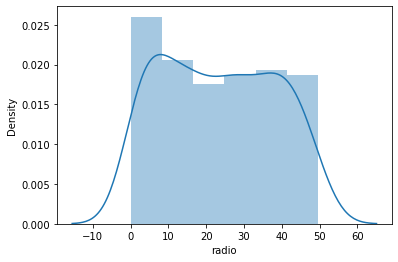

In [13]:
sns.distplot(df['radio'])

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

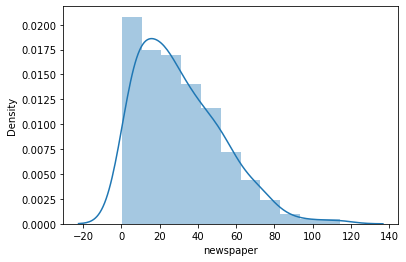

In [14]:
sns.distplot(df['newspaper'])

distribution plot is showing little skewness in ewspaper column

CORRELATION MATRIX

In [16]:
cor=df.corr()
cor

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


TV is positively correlated with sales

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'Unnamed: 0'),
  Text(0, 1.5, 'TV'),
  Text(0, 2.5, 'radio'),
  Text(0, 3.5, 'newspaper'),
  Text(0, 4.5, 'sales')])

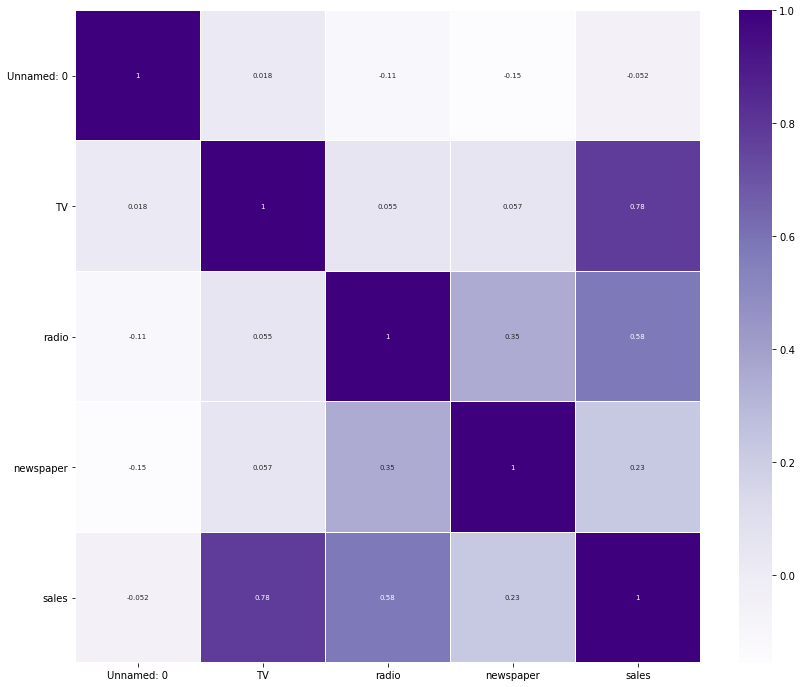

In [17]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="Purples", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0)

heatmap is showing very positive correlation from sales column with tv and radio and some correlation with newspaper also.

dark shades is indicating positive correlations

PAIRPLOT

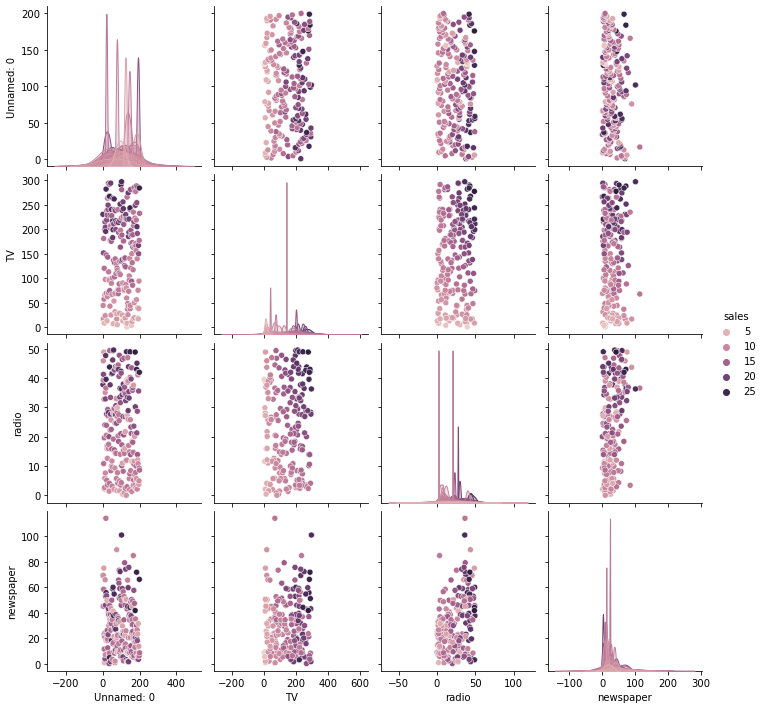

In [18]:
sns.pairplot(df,hue='sales')

All the columns are showing positivity with sales

SPLITTING THE DATASET

In [19]:
x=df.drop('sales',axis=1)
y=df['sales']

In [20]:
x

,Unnamed: 0,TV,radio,newspaper
0,1,230.1,37.8,69.2
1,2,44.5,39.3,45.1
2,3,17.2,45.9,69.3
3,4,151.5,41.3,58.5
4,5,180.8,10.8,58.4
...,...,...,...,...
195,196,38.2,3.7,13.8
196,197,94.2,4.9,8.1
197,198,177.0,9.3,6.4
198,199,283.6,42.0,66.2


Now we have 200 rows and 4 columns in x variable

In [21]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In y variable we have only sales column with length of 200 and data type is float

now dateset has been splitted into x and y variable.

TRAIN TEST SPLIT

In [23]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=42)

In [33]:
x_train.shape

(160, 4)

in x_train we have 160 rows and 4 columns after train_test_split

In [24]:
x_test.shape

(40, 4)

in x_test we have 40 rows and 4 columns after train_test_split

In [25]:
y_train.shape

(160,)

In [26]:
y_test.shape

(40,)

MODEL BUILDING

IMPORTING THE LIBRARIES FOR MODEL BUILDING

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [34]:



#for Linear Regression

lr=LinearRegression()
lr.fit(x_train,y_train)
pred_y=lr.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y_test,pred_y))
print('mean squared error', mean_squared_error(y_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y_test,pred_y)))

r2 score 0.8986489151417081
error
mean absolute error 1.4650601050102927
mean squared error 3.1990044685889005
root mean squared error 1.7885761008659655


Linear Regression model is predicting 89% r2 score.
mean absolute error for Linear Regression is 1.46,
mean squared error for Linear Regression is 3.19,
root mean squared error for Linear Regression is 1.78

In [45]:
lr.coef_

array([0.00064359, 0.04471835, 0.18925118, 0.00304577])

coefficient of the Linear Regression

In [33]:
#For Lasso
from sklearn.linear_model import Lasso

ls=Lasso()

ls.fit(x_train,y_train)
pred_y=ls.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y_test,pred_y))
print('mean squared error', mean_squared_error(y_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y_test,pred_y)))


r2 score 0.9001586308815881
error
mean absolute error 1.4530467578554116
mean squared error 3.1513524142973472
root mean squared error 1.7752048936101283


Lasso Regression is predicing 90% r2 score.
mean absolute error for Lasso Regression is 1.45,
mean squared error for Lasso Regression is 3.15,
root mean squared error for Lasso Regression is 1.77


In [50]:
ls.coef_

array([0.00020037, 0.04462722, 0.18536764, 0.00151066])

coefficient of the Lasso Regression

In [35]:
# for Ridge
from sklearn.linear_model import Ridge

#For Ridge

rd=Ridge()

rd.fit(x_train,y_train)
pred_y=rd.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y_test,pred_y))
print('mean squared error', mean_squared_error(y_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y_test,pred_y)))



r2 score 0.8986489976571697
error
mean absolute error 1.465068752816445
mean squared error 3.199001864104396
root mean squared error 1.7885753727770033


Ridge Regression is predictic 89% r2 score.
mean absolute error for Ridge Regression is 1.46, mean squared error for Ridge Regression is 3.19, root mean squared error for Ridge Regression is 1.78

In [51]:
rd.coef_

array([0.00064356, 0.04471836, 0.18924481, 0.0030475 ])

coefficient of the Ridge Regression 

In [36]:
#For ElasticNet
from sklearn.linear_model import ElasticNet


en=ElasticNet()

en.fit(x_train,y_train)
pred_y=en.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y_test,pred_y))
print('mean squared error', mean_squared_error(y_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y_test,pred_y)))


r2 score 0.8994476480588866
error
mean absolute error 1.4594611152047146
mean squared error 3.173793587276327
root mean squared error 1.781514408383027


ElasticNet is predicting 89% r2 score.
 mean absolute error for ElasticNet Regression is 1.45, mean squared error for ElasticNet Regression is 3.17, root mean squared error for ElasticNet Regression is 1.78

In [52]:
en.coef_

array([0.00041956, 0.0446737 , 0.18680747, 0.00241589])

coefficient of ElasticNet Regression

CHECKING R2 SCORE THROUGH CROSS VALIDATION

In [37]:
from sklearn.model_selection import cross_val_score

In [40]:
# For Linear Regression


score=cross_val_score(lr,x,y,cv=5)
print('cv score',np.mean(score))


cv score 0.8842777844741689


cross validation score of linear regression is 88%

In [41]:
# For Lasso


score=cross_val_score(ls,x,y,cv=5)
print('cv score',np.mean(score))

cv score 0.8858863329447579


cross validation score of lasso is 88%

In [42]:
# For Ridge


score=cross_val_score(rd,x,y,cv=5)
print('cv score',np.mean(score))

cv score 0.884278138075364


cross validation score of ridge is 88%

In [43]:

#For ElasticNet

score=cross_val_score(en,x,y,cv=5)
print('cv score',np.mean(score))

cv score 0.8851877809767806


cross validation score of ridge is 88%

CLASSIFICATION ALGORITHMS A REGRESSION MODEL

In [53]:


from sklearn.svm import SVR

kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.8890256692188028
0.8759650005077199
0.7660598050103244


Support vector regression is predicting 88% score for kernel 'liner',
87% for kernel 'poly' and 76% score for kernel 'rbf'.

HYPER PARAMETER TUNING

for getting best model

In [72]:
from sklearn.ensemble import RandomForestRegressor

In [80]:
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}

rf=RandomForestRegressor(max_depth=5, random_state=0)
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(max_depth=5, random_state=0),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [85]:
rf=RandomForestRegressor(criterion='mse',max_features='auto',max_depth=5, random_state=42)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)


rfs=r2_score(y_test,pred_decision)
print('r2 score:', rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('cross val score',rfc*100)

r2 score: 97.50450990768994
cross val score 96.7267651792473


In [84]:
rf=RandomForestRegressor(criterion='mae',max_features='auto',max_depth=5, random_state=42)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)


rfs=r2_score(y_test,pred_decision)
print('r2 score:', rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('cross val score',rfc*100)

r2 score: 97.34124936264584
cross val score 96.50253744560453


After optimization of hyper parameter tuning with taking both criterion 'mse' and 'mae',max_features and ,max_depth and random state ,we can say that models is predicting extremly well.
other than that if we take (criterion='mse',max_features='auto',max_depth=5, random_state=42) then the performance will be best.